In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

col = plt.cm.Oranges(np.linspace(0,0.5,2))

import random
import mph
import numpy as np
import matplotlib.pyplot as plt
import os    
import time
from tqdm.notebook import tqdm
import pickle
os.environ['KMP_DUPLICATE_LIB_OK']='True'

path = 'D:/Josh/Fall 2021/ML-LWA/1dsim_test.mph'

scattering = [1,2,5,6,7,51,53,56,57]

In [2]:
def start_client(path):
    global model
    global pymodel
    global client
    client = mph.start(version = '5.3a')
    pymodel = client.load(path)
    model = pymodel.java
    
def save_model():
    model.save(path)
    
def generate_image(random_pattern):
    adjusted = [x - 15 for x in random_pattern]
    out = np.flip(np.array([1 if x in adjusted else 0 for x in np.arange(36)]))
    return out
    
def simulate_random(grids_of_interest):
    global start_count
    this_scattering = scattering + grids_of_interest
    
    model.physics("emw").feature("sctr1").selection().set(this_scattering);
    model.physics("emw").feature("ffd1").feature("ffc1").selection().set(grids_of_interest);

    model.geom("geom1").runAll();
    model.mesh().run();
    model.sol("sol1").runAll();
    
    model.result("pg4").set("data", 'dset1')
    model.result("pg4").feature("ff1").run()
    model.result().export("plot1").set("filename", save_str + '.csv')
    model.result().export("plot1").set("plotgroup", "pg4")
    model.result().export("plot1").set("plot", "ff1")
    
    model.result().export("plot1").run()

    return grids_of_interest

In [ ]:
with open('generated_slots.pkl', 'rb') as f:
    examples = pickle.load(f)

In [ ]:
plt.plot(examples[0][0])

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(tf.expand_dims(examples[9][1],1))
ax[1].imshow(tf.expand_dims(examples[9][2],1))
ax[2].imshow(tf.round(tf.expand_dims(examples[9][2],1)))

In [ ]:
list(np.where(np.flip(tf.round(examples[9][2])))[0])

In [ ]:
np.where((np.flip(tf.round(examples[9][2]))))

In [ ]:
[27,29]

In [ ]:
save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/1d/signal_to_slot/back_results/' + str(int(time.time()))

start_client(path)

goi_list = []

for i in np.arange(10):
    goi = simulate_random(list(np.where(np.flip(tf.round(examples[i][2])))[0] + 15))
    goi_list.append(goi)

In [8]:
save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/1d/signal_to_slot/back_results/' + str(int(time.time()))

start_client(path)

goi_list = []
goi = simulate_random([42,44])
goi_list.append(goi)

In [27]:
img = [1 if i in [27,29] else 0  for i in np.arange(36)]

In [15]:
test_data = np.loadtxt('C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/1d/signal_to_slot/back_results/1646598178.csv', delimiter=",", dtype=float)
curve = np.loadtxt('C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/1d/signal_to_slot/test_curve.csv', delimiter=",", dtype=float)

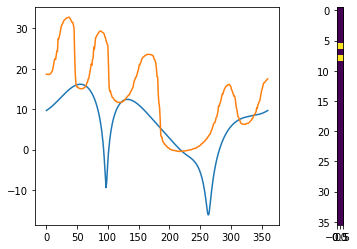

In [33]:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [8, 2]})
ax[0].plot(20*np.log10(test_data[:,1]))
ax[0].plot(curve[:,1])
ax[1].imshow(np.flip(tf.transpose(tf.expand_dims(img,0))))

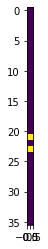

In [6]:
plt.imshow(tf.expand_dims(generate_image(goi),axis=1))

In [ ]:
test_data = np.loadtxt('C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/1d/signal_to_slot/back_results/1646590246.csv', delimiter=",", dtype=float)

In [ ]:
num_sims = int(test_data.shape[0] / 361)
points = [361 * x for x in np.arange(num_sims + 1)]
sorted_x = [test_data[i:i + 361,:] for i in points[:-1]]

In [ ]:
def plot_both(i):
    fig, ax = plt.subplots(1,3, figsize= (10,5), gridspec_kw={'width_ratios': [8, 1, 1]})
    ax[0].plot(examples[i][0])
    ax[0].plot(20*np.log10(sorted_x[i][:,1]))
    ax[0].legend(['Desired Signal','Obtained Signal'])
    ax[2].imshow(tf.round(tf.expand_dims(examples[i][1],1)), cmap = 'Oranges', vmax=2)
    ax[1].imshow(tf.round(tf.expand_dims(examples[i][2],1)), cmap = 'Blues', vmax=1.5)

In [ ]:
plot_both(1)

In [ ]:
tf.round(examples[0][1])

In [ ]:
tf.round(tf.expand_dims(examples[0][2],1))

In [ ]:
plt.imshow(tf.expand_dims(generate_image(goi_list[4]),1))

In [ ]:
plt.imshow(tf.round(tf.expand_dims(examples[4][2],1)))

In [ ]:
np.flip([1,0,1,1,1])